# **Titanic(I)**

This dataset contains 891 rows and 12 features.

**Data description**
- PassengerId - the unique id of the row
- Survival - the target variable we are trying to predict (0 = Not survived; 1 = Survived)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name, Sex, Age - self-exolanatory
Sibsp - the total number of the passengers’ siblings and spouses aboard
- Parch - the total number of the passengers’ parents and children aboard
- Ticket - the ticket number
- Fare - the passenger fare
- Cabin - the cabin number
- Embarked - the port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


**Dummy variables** (aka, indicator variables) 
- A numeric variable that represents categorical data, such as gender, race, political affiliation, etc. 
- Technically, dummy variables are dichotomous, quantitative variables. 
- Their range of values is small; they can take on only two quantitative values.
- e.g. Survived


## **1. Exploratory Data Analysis**

### **1) Preliminary Data Processing**

#### **Set-up for data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings("ignore")  # "ignore": Never print matching warnings

#### **a) Preview Data**

In [ ]:
titanic = pd.read_csv("titanic_train.csv")

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### **b) Check total number of entries and column types**

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **c) Basic Demonstration - Example: Survived**

The frequency distribution of categories within the feature can be done with the .value_counts() method.

In [ ]:
# How many people survived?
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Similarly, you could plot charts to get the same information. 

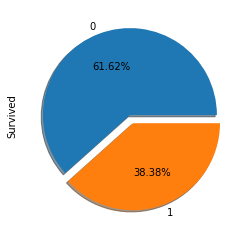

In [ ]:
titanic.Survived.value_counts().plot.pie(autopct="%.2f%%",explode=[0,0.1], shadow=True)
# Note: autopct shows the % on plot
# Note: the float is rounded up where necessary: %.2f: print as a floating point at a precision at 2
# Note: to get a percent sign printed, you must use two %% together
# Note: explode -> default "None", specifies the fraction of the radius with which to offset each wedge

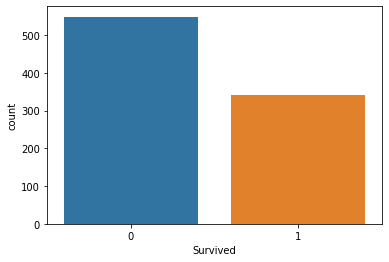

In [ ]:
sns.countplot("Survived", data=titanic)

Text(0.5, 1.0, 'Pie Chart')

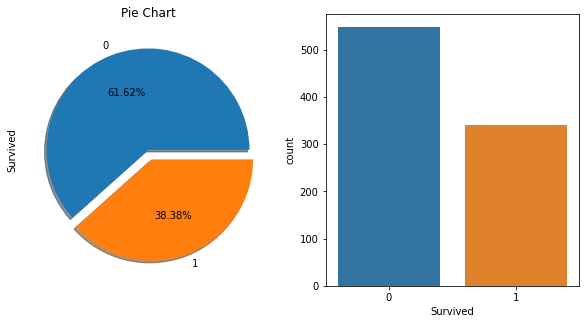

In [ ]:
f, ax = plt.subplots(1,2,figsize=(10,5)) # 1 row, 2 columns

titanic.Survived.value_counts().plot.pie(autopct="%.2f%%",explode=[0,0.1], shadow=True, ax=ax[0])
sns.countplot("Survived", data=titanic, ax=ax[1])

ax[0].set_title("Pie Chart")

In [ ]:
type(ax)

numpy.ndarray

In [ ]:
type(f)

matplotlib.figure.Figure

Only around 342 out of 891 passengers(38.4%) survived. It is evident that not many passengers survived the accident.

We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We can also check the survival rate by using different features of the dataset, e.g. Sex, Age, Port of Embarcation, etc.

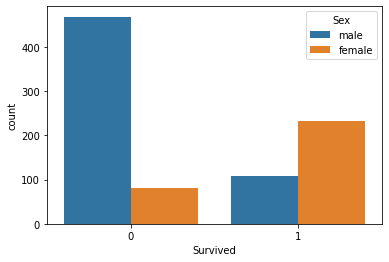

In [ ]:
sns.countplot(data= titanic, x="Survived",hue="Sex")

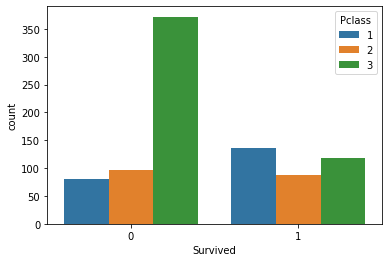

In [ ]:
sns.countplot(data= titanic, x="Survived",hue="Pclass")

### **2) Categorical Features**

**Types of Categorical features:**
1.   Nominal features/Categorical features
> Sex, Survived, Embarked



2.   Ordinal features
> Pclass

3.   Continuous features
> Age, Fare

#### **a) Analyzing the Nominal / Categorical Features(Example: Sex)**

In [ ]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic.groupby(["Sex","Survived"])["Survived"].count() #groupby categorical data are put on the rows, numeric data are placed on the columns

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

From the data, you can see that the number of men on the ship is a lot more than the number of women. But the number of women saved is almost twice the number of males saved. The survival rate for a woman on the ship is around 75% while that for men is around 18-19%.

This seems to be an important feature for modeling.

#### **b) Analyzing the Ordinal Features(Example: Pclass)**

In [ ]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# .crosstab()
pd.crosstab(index=titanic["Pclass"],columns=titanic["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
pd.crosstab(titanic["Pclass"],titanic["Survived"], margins=True) # margins: Add row/column margins (subtotals).

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


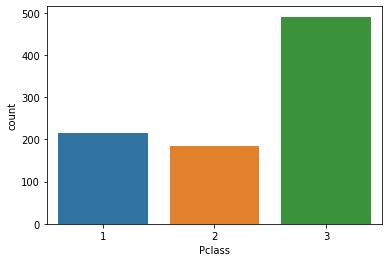

In [ ]:
sns.countplot(x="Pclass", data=titanic)

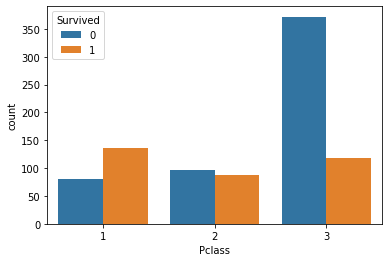

In [ ]:
sns.countplot(x="Pclass", data=titanic, hue="Survived")

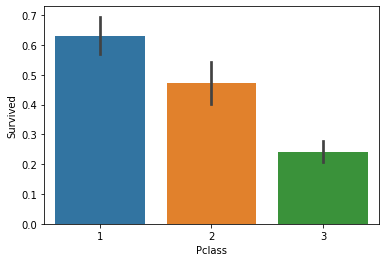

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=titanic) # auto set as mean

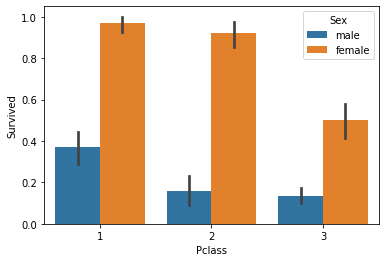

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=titanic, hue="Sex")

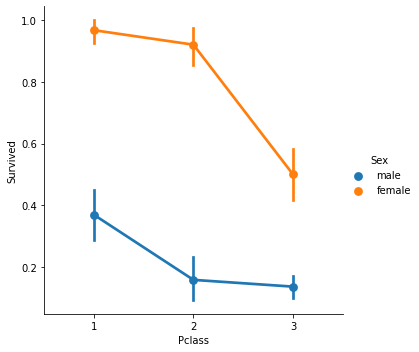

In [ ]:
sns.factorplot(x="Pclass", y="Survived", data=titanic, hue="Sex")

Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survivors was very low, somewhere around 25%.

But for Pclass 1 %survived is around 63% while for Pclass2 is around 48%. We can see that Passengers of Pclass 1 were given a very high priority while rescue. 

So money and status matters.

#### **c) Analyzing the Continuous Features(Example: Age)**

In [ ]:
titanic.Age.mean()

29.69911764705882

### **3) Checking for null values**

In [ ]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


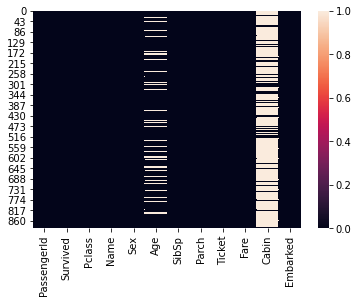

In [ ]:
# method 1: seaborn.heatmap
sns.heatmap(titanic.isnull())

In [ ]:
# method 2: pandas method
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.isnull().any() 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## **2. Data Cleaning**

### **1) Filling the null data**

#### **Example 1: Filling NaN Ages**

The Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

##### **Method 1: Using Pclass' mean age**

In [ ]:
titanic["Age"].mean()

29.69911764705882

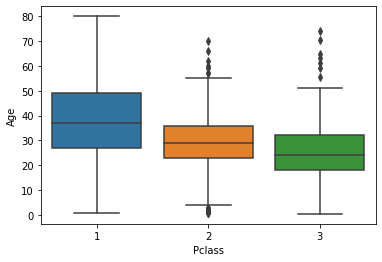

In [ ]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

In [ ]:
titanic[titanic["Pclass"]==1]["Age"].mean()

38.233440860215055

In [ ]:
titanic[titanic["Pclass"]==2]["Age"].mean()

29.87763005780347

In [ ]:
titanic[titanic["Pclass"]==3]["Age"].mean()

25.14061971830986

In [ ]:
titanic["Age2"]=0

In [ ]:
titanic.loc[(titanic.Age.isnull())&(titanic["Pclass"]==1),"Age2"]=38.233440860215055
titanic.loc[(titanic.Age.isnull())&(titanic["Pclass"]==2),"Age2"]=29.87763005780347
titanic.loc[(titanic.Age.isnull())&(titanic["Pclass"]==3),"Age2"]=25.14061971830986

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

##### **Method 2: Using Name feature**
But there were many people with many different ages. We should not assign a 5 year kid with the mean age that is 29 years. 
How can we find out what age-band the passenger lies?

We can check the Name feature. From the data, we can see that the names have a salutation like Mr or Mrs. Therefore we can assign the mean values of Mr and Mrs to the respective groups.

In [ ]:
titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

**a) Regular Expression (Regex)**

[Regex101](https://regex101.com)

In [ ]:
# .str.extract()
titanic.Name.str.extract("([A-Za-z]+)\.")

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [ ]:
# 1. Create a new column
titanic["Initial"] = 0

In [ ]:
# 2. Update the column

# method 1
titanic["Initial"] = titanic.Name.str.extract("([A-Za-z]+)\.") # It looks for strings which lie between A-Z or a-z and followed by a .(dot)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.00000,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.00000,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.00000,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.00000,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.00000,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.00000,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.00000,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,25.14062,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.00000,Mr


In [ ]:
# method 2
for i in titanic:
  titanic["Initial"] = titanic.Name.str.extract("([A-Za-z]+)\.")

In [ ]:
titanic.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Mme           1
Ms            1
Sir           1
Capt          1
Don           1
Countess      1
Lady          1
Name: Initial, dtype: int64

There are some misspelled Initials like Mlle or Mme that stand for Miss. 
Let's replace them with Miss and the same thing for other values.

In [ ]:
# 3. Replace misspelled initials
old_list = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']

new_list = ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']

In [ ]:
# .replace([old_list],[updated_list],inplace=True)
titanic['Initial'].replace(old_list, new_list, inplace=True)

In [ ]:
titanic.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

**b) Filling NaN Ages**

In [ ]:
# 1. Get mean age 
titanic.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age2
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,2.514062
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,4.987254
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,6.303321
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,4.190024
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,0.000000


In [ ]:
titanic.groupby("Initial").mean()["Age"]

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# 2. Get null age
titanic.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
titanic.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
titanic.Age.isnull().any()

True

In [ ]:
# 3. Assign values
titanic.Initial =="Mr"

0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Initial, Length: 891, dtype: bool

In [ ]:
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial =="Mr")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.140620,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.877630,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,25.140620,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,25.140620,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,25.140620,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,38.233441,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,25.140620,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,25.140620,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,25.140620,Mr


In [ ]:
# Set values -> df.loc['a','b']=x
# Set value for all items matching the list of labels
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial =="Mr"),"Age"]=33 #it works to update the row data

In [ ]:
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial =="Mr")] #all the data is not null now

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,Initial


In [ ]:
# Assign the NaN Values with the Ceil values of the mean ages
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial =="Mrs"),"Age"]=36 
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial =="Master"),"Age"]=5
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial =="Miss"),"Age"]=22 
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial =="Other"),"Age"]=46 

In [ ]:
titanic.Age.isnull().any() # So no null values left finally 

False

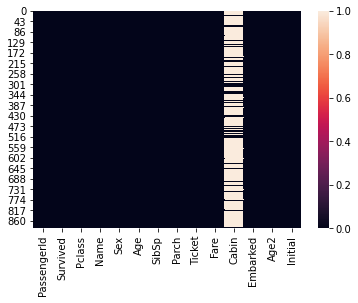

In [ ]:
# titanic.isnull()
sns.heatmap(titanic.isnull())

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
Initial          0
dtype: int64

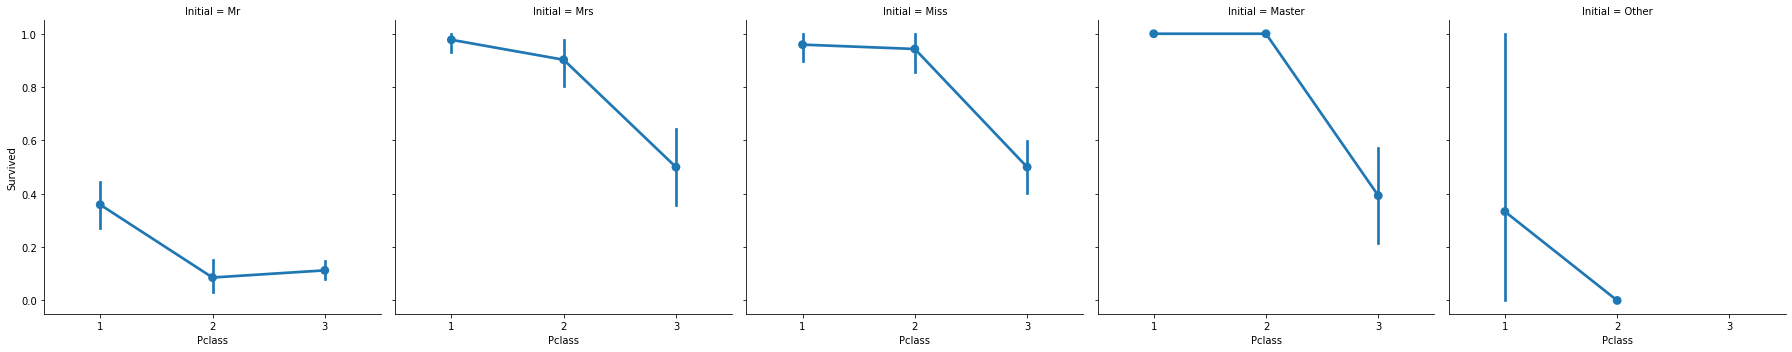

In [ ]:
sns.factorplot(x="Pclass", y="Survived", data=titanic, col="Initial")

The Women and Child first policy holds true irrespective of the class.

#### **Example 2: Filling Embarked NaN**

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
Initial          0
dtype: int64

From the data, we can see that maximum passengers boarded from Port S, therefore we can replace NaN with S.

In [ ]:
# .fillna()
titanic.Embarked.fillna("S",inplace=True)